In [153]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import qutip

import system.from_higher_basis_truncation_tunable_full_cosine as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as tukey
importlib.reload(tukey)
import pulse.tukey_derivative as tukey_derivative
importlib.reload(tukey_derivative)
import utils.expectation_values as expect
importlib.reload(expect)
import optimization.grape as grape
importlib.reload(grape)
import utils.graph as graph
importlib.reload(graph)

pass

In [154]:
amp = 11
freq = system.first_energy_spacing/3 - 0.05
period = (2*np.pi) / freq
def steady(t, args):
    return amp * np.cos(t * freq)

H = [system.H0, [system.H1, steady]]

In [155]:
U = qutip.propagator(H, period, c_op_list=[], options=qutip.Options(nsteps=10000))

In [156]:
# find the eigenstates for the propagator
evals, evecs = np.linalg.eig(U.full())

eargs = np.angle(evals)

# # make sure that the phase is in the interval [-pi, pi], so that
# # the quasi energy is in the interval [-pi/T, pi/T] where T is the
# # period of the driving.  eargs += (eargs <= -2*pi) * (2*pi) +
# # (eargs > 0) * (-2*pi)
# eargs += (eargs <= -np.pi) * (2 * np.pi) + (eargs > np.pi) * (-2 * np.pi)

e_quasi = -eargs / period

In [157]:
e_quasi

array([-2.41468126, -0.89266342, -0.96406534,  0.77242803,  1.47630724,
        2.13989214,  3.75094564,  3.93968066,  2.50584927,  3.19204755])

In [158]:
f_modes_0, f_energies = qutip.floquet.floquet_modes(H, period)
np.sort(f_energies)

array([-2.41468126, -0.96406534, -0.89266342,  0.77242803,  1.47630724,
        2.13989214,  2.50584927,  3.19204755,  3.75094564,  3.93968066])

In [159]:
e_Args = system.H0.eigenenergies() % freq
e_Args += (e_Args <= -freq/2) * (freq) - (e_Args > freq/2) * (freq)
np.sort(e_Args)

array([-4.09904111, -3.62710433, -3.23037919, -3.08037919, -2.62518782,
       -1.86884185, -0.03830512,  1.44191814,  1.79882401,  4.03260013])

In [160]:
system.basis_states[1]

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.00000000e+00]
 [-9.98670775e-01]
 [ 0.00000000e+00]
 [-4.93950634e-02]
 [ 0.00000000e+00]
 [-1.45336988e-02]
 [ 0.00000000e+00]
 [-2.27547452e-03]
 [ 0.00000000e+00]
 [-6.35988785e-04]]

In [163]:
f_modes_0[1]

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.15310235+2.91465120e-07j]
 [ 0.55039791+0.00000000e+00j]
 [ 0.26471102-5.77561402e-06j]
 [-0.51249975-1.02987869e-05j]
 [ 0.43028749+4.96116379e-06j]
 [-0.29682755+6.35328737e-06j]
 [ 0.20044584-1.03391660e-05j]
 [-0.13497806-5.26181235e-06j]
 [ 0.08348821+7.44493383e-06j]
 [-0.04766637-7.62057532e-06j]]

In [136]:
t = 0.0001 # ns
f_modes_t = qutip.floquet.floquet_modes_t(f_modes_0, f_energies, t, H, period, args=None)
#(f_modes_t[0] - f_modes_0[0])

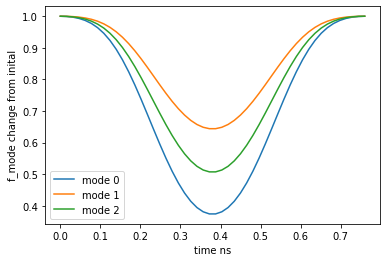

In [137]:
pops0 = []
pops1 = []
pops2 = []
pops = []
tlist = np.linspace(0, period*3, 50)
for t in tlist:
    f_modes_t = qutip.floquet.floquet_modes_t(f_modes_0, f_energies, t, H, period, args=None)
    pops0.append(expect.expectation_value(f_modes_0[0], f_modes_t[0]))
    pops1.append(expect.expectation_value(f_modes_0[1], f_modes_t[1]))
    pops2.append(expect.expectation_value(f_modes_0[2], f_modes_t[2]))

plt.plot(tlist, pops0, label="mode 0")
plt.plot(tlist, pops1, label="mode 1")
plt.plot(tlist, pops2, label="mode 2")
plt.xlabel("time ns")
plt.ylabel("f_mode change from inital")
plt.legend()

In [138]:
freq

8.267223706634018